## Prácticas Naive Bayes y KNN (ejercicio 4)

#### 1. Tomando como base este [tutorial](https://colab.research.google.com/drive/1zFIOfrceEaFkhQOEOkMWroBmNV1HAMVS?usp=drive_link),  crea un modelo de clasificación usando KNN con los mismos datos sintéticos. Para la elección de los mejores hiperparámetros usa un sistema de [validación cruzada](https://educacionadistancia.juntadeandalucia.es/centros/cordoba/pluginfile.php/406946/mod_resource/content/1/M2_SAA_S10%20-%20Validaci%C3%B3n.pdf).

#### 2. Usando los datos almacenados en data2.csv, crea un modelo de clasificación usando los modelos de NaiveBayes mostrados en el [vídeo 5](https://vimeo.com/600140324). Indicad qué modelo da mejores resultados. Os toca investigar cómo cargar un archivo csv desde Google Collab.

#### 3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.

#### **4. Plantea el problema anterior con un modelo de regresión usando KNN. En el [vídeo 7](https://vimeo.com/600141357) hay un ejemplo de regresión con KNN.**

#### 5. Usando los datos almacenados en data5.csv, crea un modelo de clasificación usando NaiveBayes y KNN. Haz un estudio inicial de las correlaciones entre las variables.

#### author: Virginia Ordoño Bernier - date: december 2023


### 1. Carga de datos

In [10]:
import pandas as pd

df_wine = pd.read_csv("data/winequality-red.csv")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 2. Comprobación tipo de datos y nulos

In [11]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
total_nulls = df_wine.isnull().sum()
total_nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. KNeighbors Classifier

In [13]:
from sklearn.model_selection import train_test_split

# Array with column names except target
wine_features = df_wine.columns[:11]

# Separación de variables predictoras y variable objetivo:
X_wine = df_wine[wine_features]
y_wine = df_wine['quality'] 

# Separación datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.4, random_state=42)
X_wine.reset_index(inplace = True)
X_wine.reset_index(inplace = True)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Parámetros
k = 15
w = 'uniform'

# Instancia del modelo
model_kn = KNeighborsClassifier(n_neighbors=k, weights=w)

# Entrenamiento del modelo
model_kn.fit(X_train, y_train)

# Predicción
y_pred = model_kn.predict(X_test)

# Evaluación del modelo
acc = accuracy_score(y_test, y_pred)
print('Precisión KNeighborsClassifier: ', acc)


Precisión KNeighborsClassifier:  0.4890625


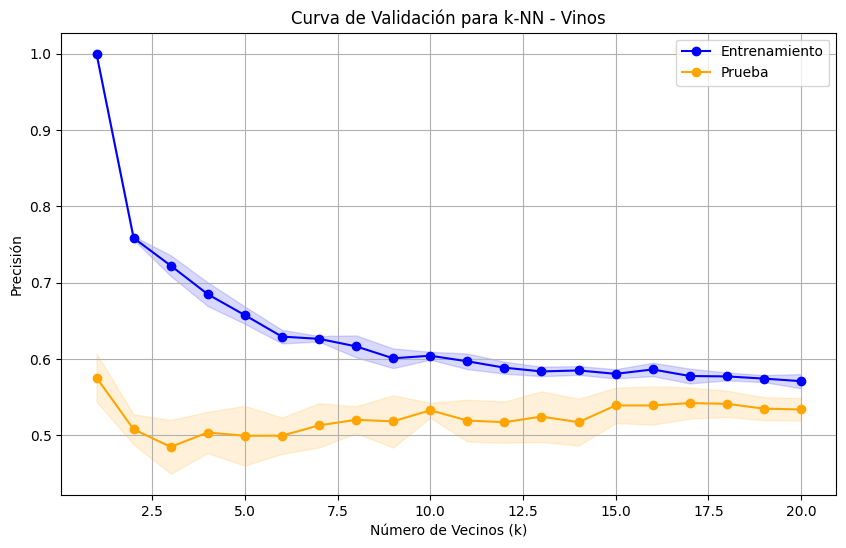

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

# Definir el rango de valores para el número de vecinos
neighbors_range = np.arange(1, 21)

# Calcular la curva de validación
train_scores, test_scores = validation_curve(model_kn, X_train, y_train, param_name="n_neighbors", param_range=neighbors_range, scoring="accuracy", cv=5)

# Calcular la precisión media y desviación estándar para el conjunto de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de validación
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_mean, label="Entrenamiento", color="blue", marker='o')
plt.fill_between(neighbors_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")

plt.plot(neighbors_range, test_mean, label="Prueba", color="orange", marker='o')
plt.fill_between(neighbors_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color="orange")

plt.title('Curva de Validación para k-NN - Vinos')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.legend(loc="best")
plt.grid(True)
plt.show()

### 5. KNeighbors Regressor

In [16]:
from sklearn.model_selection import train_test_split

# Selección features del dataset
wine_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

# Separación de variables predictoras y variable objetivo:
X_wine = df_wine[wine_features]
y_wine = df_wine['quality'] 

# Separación datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.4, random_state=42)
X_wine.reset_index(inplace = True)
X_wine.reset_index(inplace = True)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Parámetros
k = 15
w = 'uniform'

# Instancia del modelo
model_kr = KNeighborsRegressor(k, weights=w)

# Entrenamiento del modelo
model_kr.fit(X_train, y_train)

# Predicción
y_pred = model_kr.predict(X_test)

# Evaluación con error cuadrático medio
mse = mean_squared_error(y_pred, y_test)
print(f'Error cuadrático medio = {mse}')

Error cuadrático medio = 0.42652777777777773


Error cuadrático medio = 0.42652777777777773


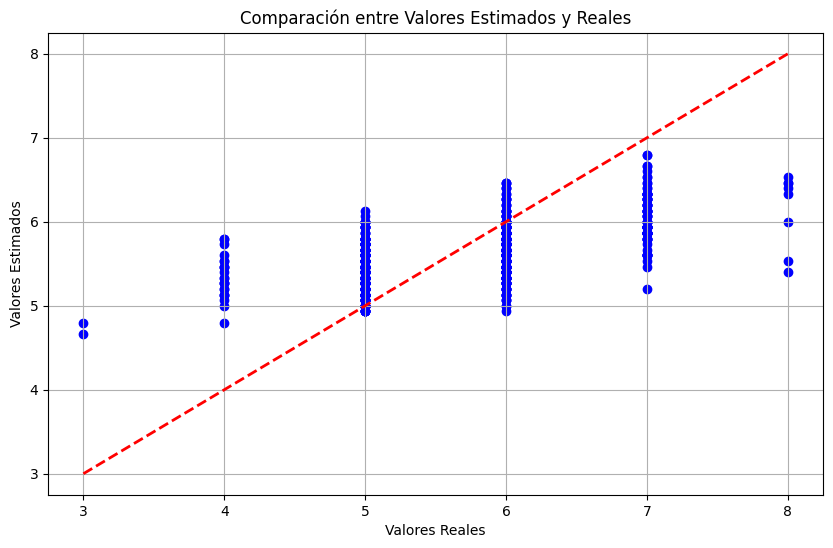

In [18]:
# Gráfica que compara los valores estimados con los valores reales para ver dónde se han cometido más errores. 
# Los peores resultados suelen aparecer en los valores más extremos.add()

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Entrenamiento del modelo
model_kr.fit(X_train, y_train)

# Predicción
y_pred = model_kr.predict(X_test)

# Evaluación con error cuadrático medio
mse = mean_squared_error(y_pred, y_test)
print(f'Error cuadrático medio = {mse}')

# Graficar la comparación entre valores estimados y reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Comparación entre Valores Estimados y Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Estimados')
plt.grid(True)
plt.show()

